In [77]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl
import numpy as np
from pandas.plotting import scatter_matrix
from matplotlib import cm
from sklearn.ensemble import RandomForestClassifier
file_errors_location = r'C:\Users\16303\Documents\Semester 1\Data Analytics\HW2\WHQ.xlsx'
df = pd.read_excel(file_errors_location)

In [53]:
df.head()

,Country name,Year,Happiness Scale,Happiness Index,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Confidence in national government,Democratic Quality
0,Afghanistan,2017,Low,2.661718,7.497755,0.490880,52.799999,0.427011,-0.112198,0.954393,0.261179,-1.886566
1,Central African Republic,2016,Low,2.693061,6.465948,0.290184,44.900002,0.624057,0.053440,0.859073,0.748755,-1.437883
2,Afghanistan,2018,Low,2.694303,7.494588,0.507516,52.599998,0.373536,-0.084888,0.927606,0.364666,NaN
3,Liberia,2015,Low,2.701591,6.665998,0.637666,53.700001,0.671431,-0.014139,0.902673,0.472788,-0.519526
4,South Sudan,2017,Low,2.816622,NaN,0.556823,51.000000,0.456011,NaN,0.761270,0.461551,-2.138769


In [54]:
df.shape

(713, 12)

In [55]:
df=df.dropna()

In [56]:
df.shape

(507, 12)

In [57]:
df.describe()

,Year,Happiness Index,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Confidence in national government,Democratic Quality
count,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000
mean,2015.504931,5.413939,9.238503,0.806525,63.859354,0.756630,0.010771,0.741413,0.482506,-0.024570
std,1.123533,1.159876,1.195615,0.124141,7.375758,0.133467,0.161073,0.186627,0.195697,0.855764
min,2014.000000,2.661718,6.465948,0.290184,44.900002,0.303540,-0.291227,0.047311,0.084061,-2.132233
25%,2014.500000,4.512378,8.203515,0.739197,58.150000,0.662416,-0.099265,0.683304,0.325611,-0.641447
50%,2016.000000,5.362475,9.454056,0.832078,65.599998,0.775546,-0.017152,0.800893,0.468559,-0.085113
75%,2017.000000,6.254614,10.206539,0.906696,69.300003,0.861179,0.106516,0.865436,0.620620,0.702891
max,2017.000000,7.788252,11.460800,0.987343,76.500000,0.985178,0.667136,0.976340,0.993604,1.575009


In [58]:
df.columns

Index(['Country name', 'Year', 'Happiness Scale', 'Happiness Index',
       'Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption',
       'Confidence in national government', 'Democratic Quality'],
      dtype='object')

In [59]:
X = df.drop(['Happiness Scale','Country name','Happiness Index'],axis=1)
y = df['Happiness Scale']

In [60]:
from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [61]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [62]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.75
Accuracy of Logistic regression classifier on test set: 0.72


C:\Users\16303\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\16303\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [63]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier().fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.76


In [64]:
clf2 = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf2.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf2.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.81
Accuracy of Decision Tree classifier on test set: 0.80


In [65]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.84
Accuracy of K-NN classifier on test set: 0.73


In [66]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 0.78
Accuracy of LDA classifier on test set: 0.75


In [67]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.75
Accuracy of GNB classifier on test set: 0.78


In [68]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.74
Accuracy of SVM classifier on test set: 0.76


C:\Users\16303\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [69]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = lda.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[38  0  9]
 [ 0 47 10]
 [15  4 30]]
              precision    recall  f1-score   support

        High       0.72      0.81      0.76        47
         Low       0.92      0.82      0.87        57
      Medium       0.61      0.61      0.61        49

    accuracy                           0.75       153
   macro avg       0.75      0.75      0.75       153
weighted avg       0.76      0.75      0.75       153



In [70]:
y_pred = lda.predict(X_test)

In [71]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7516339869281046


[Text(141.64615384615385, 190.26, 'X[3] <= 0.511\nentropy = 0.662\nsamples = 354\nvalue = [112, 138, 104]'),
 Text(51.50769230769231, 135.9, 'X[1] <= 0.326\nentropy = 0.103\nsamples = 110\nvalue = [0, 104, 6]'),
 Text(25.753846153846155, 81.53999999999999, 'entropy = 0.0\nsamples = 67\nvalue = [0, 67, 0]'),
 Text(77.26153846153846, 81.53999999999999, 'X[3] <= 0.24\nentropy = 0.24\nsamples = 43\nvalue = [0, 37, 6]'),
 Text(51.50769230769231, 27.180000000000007, 'entropy = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(103.01538461538462, 27.180000000000007, 'entropy = 0.102\nsamples = 37\nvalue = [0, 35, 2]'),
 Text(231.7846153846154, 135.9, 'X[3] <= 0.745\nentropy = 0.609\nsamples = 244\nvalue = [112, 34, 98]'),
 Text(180.27692307692308, 81.53999999999999, 'X[2] <= 0.629\nentropy = 0.607\nsamples = 150\nvalue = [36, 34, 80]'),
 Text(154.52307692307693, 27.180000000000007, 'entropy = 0.34\nsamples = 23\nvalue = [0, 18, 5]'),
 Text(206.03076923076924, 27.180000000000007, 'entropy = 0.555

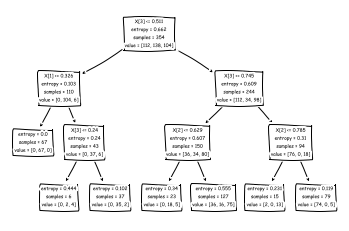

In [72]:

from sklearn import tree
tree.plot_tree(clf2.fit(X_train, y_train)) 

In [73]:
feature_names=list(X.columns) 

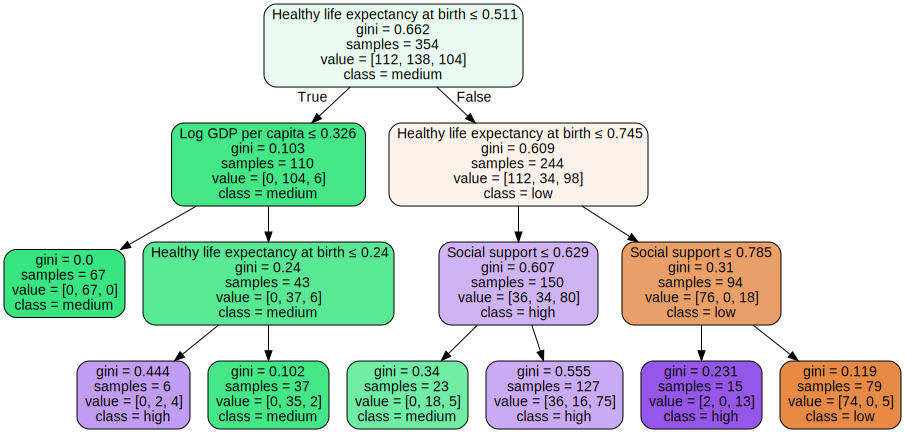

In [75]:
import graphviz
dot_data = tree.export_graphviz(clf2, out_file=None, 
                     feature_names=feature_names,  
                     class_names=['low','medium','high'],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [25]:
train, validation = train_test_split(df, test_size=0.50, random_state = 5)

In [26]:
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(354, 9) (354,)
(153, 9) (153,)


In [27]:
Change = {'Low': 0,'Medium': 1,'High':2}
df['Happiness Scale'] = [Change[item] for item in df['Happiness Scale']] 

In [28]:
X = df.drop(['Happiness Scale','Country name','Happiness Index'],axis=1)
y = df['Happiness Scale']

In [29]:
from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [30]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [31]:
predictions[0:5]

array([ 1.86350439,  1.23557846,  0.57761114, -0.47115128,  0.76764905])

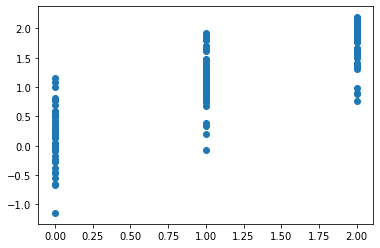

In [32]:
plt.scatter(y_test, predictions)

In [47]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=2) # Define the split - into 2 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator
print(kf) 

KFold(n_splits=2, random_state=None, shuffle=False)


In [48]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)